Import Dataset

#Testing

In [ ]:
!file /content/Dataset4 (2).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `file /content/Dataset4 (2).zip'


In [ ]:
import zipfile
zip_path = "/content/Dataset5.zip"
extract_path = "/content"  # Langsung ke /content

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
#import dataset
import zipfile
import os

dataset_path = "/content/Dataset5"

print(os.listdir(dataset_path))


['test', 'train']


#Ini yang salah sama ga urutan

In [ ]:
#Preprocessing
import tensorflow as tf
from tensorflow.keras import layers

dataset_path = "/content/DatasetFinal"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)


In [ ]:
#Rescaling & Normalization
normalization_layer = tf.keras.Sequential([
    layers.Rescaling(1./255)
])
normalization_layer = layers.Rescaling(1./255)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
])

base_model = ResNet50(
    weights = 'imagenet',
    include_top = False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

model = tf.keras.Sequential([
    normalization_layer,  # preprocessing now inside the model
    base_model,
    data_augmentation,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(2, activation='softmax')
])


#Densenet

In [ ]:
#Import
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 280ms/step - accuracy: 0.5980 - loss: 1.6297 - val_accuracy: 0.9588 - val_loss: 0.1753
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9688 - loss: 0.1558 - val_accuracy: 0.9918 - val_loss: 0.0733
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9589 - loss: 0.1058 - val_accuracy: 0.9732 - val_loss: 0.0705
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.9900 - loss: 0.0533 - val_accuracy: 0.9608 - val_loss: 0.0885
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.9887 - loss: 0.0486 - val_accuracy: 0.9773 - val_loss: 0.0544
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.9875 - loss: 0.0403 - val_accuracy: 0.9794 - val_loss: 0.0621
Epoch 7/10
61/61 ━━━━━━━━━━━━━

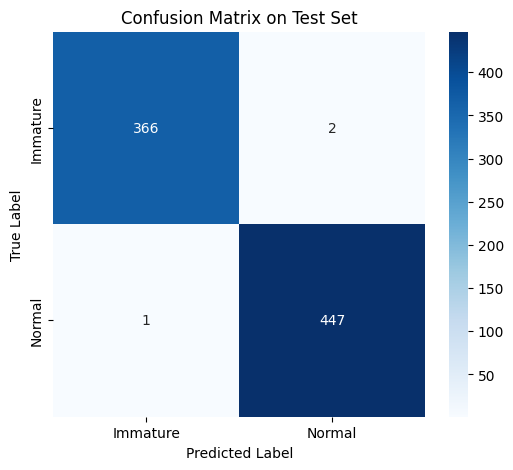

In [ ]:
#DenseNet
base_model1 = DenseNet121(
    weights = 'imagenet',
    include_top = False,
    input_shape=(224, 224, 3)
)

base_model1.trainable = False

train_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

#setup model
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

normalization_layer = layers.Rescaling(1./255)

base_model1 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model1.trainable = False

model = Sequential([
    data_augmentation,
    normalization_layer,
    base_model1,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(2, activation='softmax')
])

#Train model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

test_dataset = image_dataset_from_directory(
    '/content/Dataset5/test',
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    shuffle=False
)

class_names = test_dataset.class_names
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("📋 Classification Report on Test Set:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

In [ ]:
temp_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/Dataset5",
    image_size=(224, 224),
    batch_size = 1
)

class_names = temp_dataset.class_names
print("Class names: ", class_names)

Found 3245 files belonging to 2 classes.
Class names:  ['test', 'train']


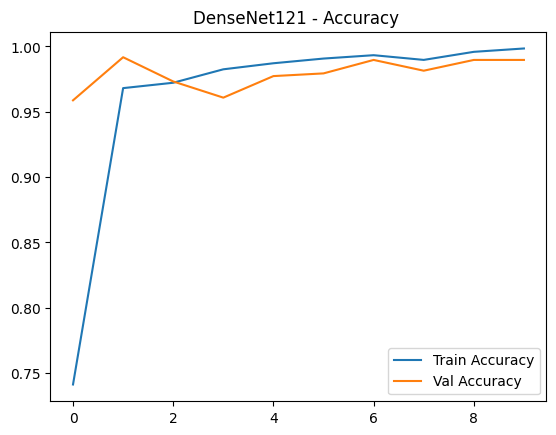

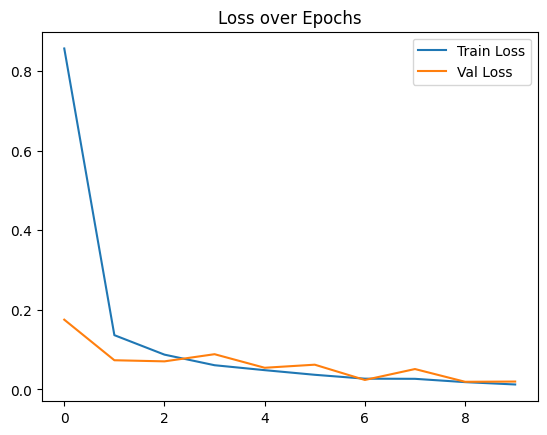

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('DenseNet121 - Accuracy ')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

#Resnet yang benar

In [ ]:
import tensorflow as tf

# Cek semua device yang tersedia
print("Devices available:")
print(tf.config.list_physical_devices())

# Cek hanya GPU
print("\nGPU available:")
print(tf.config.list_physical_devices('GPU'))

import tensorflow as tf

print("🚀 Using TensorFlow version:", tf.__version__)
print("🖥️ Available GPU devices:")
print(tf.config.list_physical_devices('GPU'))

# Menampilkan device tempat layer ditempatkan
from tensorflow.python.client import device_lib
print("\n📊 Device placement log:")
print(device_lib.list_local_devices())



Devices available:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

GPU available:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
🚀 Using TensorFlow version: 2.18.0
🖥️ Available GPU devices:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

📊 Device placement log:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12959293752556890554
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2740540188123533670
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# Overfit


Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
Found 816 files belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.4923 - loss: 0.8663 - val_accuracy: 0.4660 - val_loss: 0.6964 - learning_rate: 0.0010
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.5227 - loss: 0.7189 - val_accuracy: 0.4557 - val_loss: 0.7968 - learning_rate: 0.0010
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.4952 - loss: 0.7152 - val_accuracy: 0.5258 - val_loss: 0.6783 - learning_rate: 0.0010
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.5094 - loss: 0.7017 - val_accuracy: 0.4557 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.5129 - loss: 0.6934 - val_accuracy: 0.5443 - val_loss: 0.6828 - learning_rate: 0.0010
E

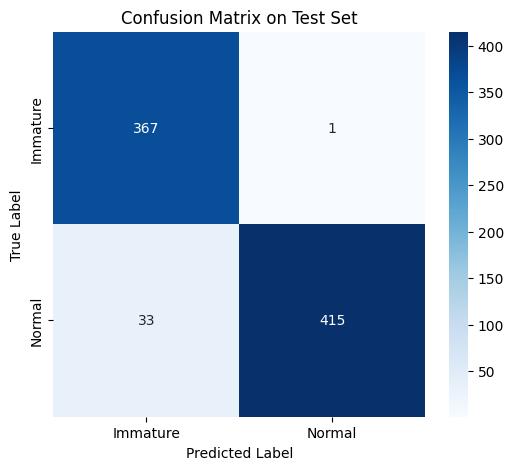

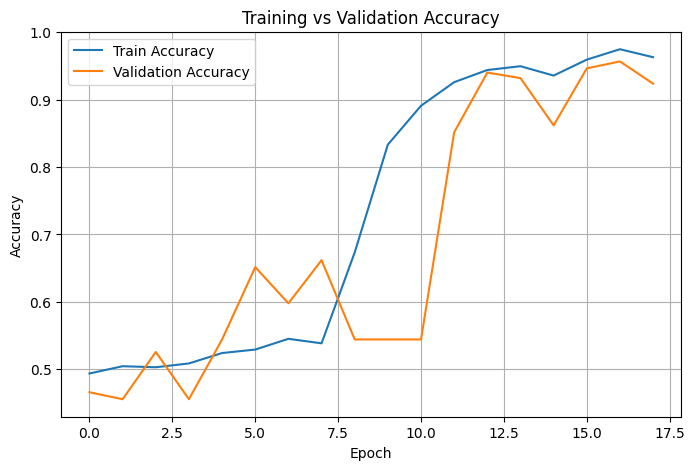

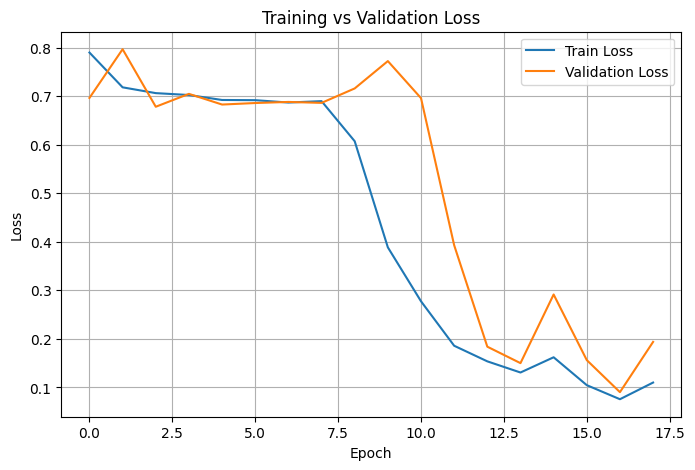

In [ ]:
#Masih Overfitting
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
train_dir = '/content/Dataset5/train'
test_dir = '/content/Dataset5/test'

# Params
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
SEED = 123

# Load dataset (tanpa prefetch dulu)
raw_train_ds = image_dataset_from_directory(
    train_dir, validation_split=0.2, subset="training",
    seed=SEED, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical'
)

raw_val_ds = image_dataset_from_directory(
    train_dir, validation_split=0.2, subset="validation",
    seed=SEED, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical'
)

test_ds = image_dataset_from_directory(
    test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical', shuffle=False
)

# Simpan nama kelas
class_names = raw_train_ds.class_names

# Prefetching
train_ds = raw_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = raw_val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Hitung class weights
y_labels = []
for _, labels in raw_train_ds:
    y_labels.extend(np.argmax(labels.numpy(), axis=1))
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_labels), y=y_labels)
class_weight_dict = dict(enumerate(class_weights))

# Augmentasi
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
])

# Model base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Model akhir
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

# Compile awal
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# Train awal
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr]
)

# Fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Compile ulang
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train fine-tune
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr]
)

# Evaluasi di test set
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("📋 Classification Report on Test Set:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

# Accuracy Plot
train_acc = history.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
train_loss = history.history['loss'] + history_finetune.history['loss']
val_loss = history.history['val_loss'] + history_finetune.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


#udh ga overfitting

Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
Found 816 files belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.4944 - loss: 0.8793

61/61 ━━━━━━━━━━━━━━━━━━━━ 52s 619ms/step - accuracy: 0.4945 - loss: 0.8778 - val_accuracy: 0.4804 - val_loss: 0.6913 - learning_rate: 0.0010
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 442ms/step - accuracy: 0.5124 - loss: 0.7175 - val_accuracy: 0.4557 - val_loss: 0.8144 - learning_rate: 0.0010
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.5215 - loss: 0.7133

61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 456ms/step - accuracy: 0.5216 - loss: 0.7131 - val_accuracy: 0.5856 - val_loss: 0.6809 - learning_rate: 0.0010
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 443ms/step - accuracy: 0.5211 - loss: 0.7003 - val_accuracy: 0.4557 - val_loss: 0.6982 - learning_rate: 0.0010
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 444ms/step - accuracy: 0.5299 - loss: 0.6927 - val_accuracy: 0.5443 - val_loss: 0.6815 - learning_rate: 0.0010
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 444ms/step - accuracy: 0.5245 - loss: 0.6940 - val_accuracy: 0.6144 - val_loss: 0.6854 - learning_rate: 0.0010
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 447ms/step - accuracy: 0.5450 - loss: 0.6865 - val_accuracy: 0.6660 - val_loss: 0.6862 - learning_rate: 2.0000e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 450ms/step - accuracy: 0.5568 - loss: 0.6873 - val_accuracy: 0.6515 - val_loss: 0.6847 - learning_rate: 2.0000e-04
Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5436 - loss: 1.0676

61/61 ━━━━━━━━━━━━━━━━━━━━ 60s 641ms/step - accuracy: 0.5436 - loss: 1.0648 - val_accuracy: 0.5464 - val_loss: 0.6792 - learning_rate: 1.0000e-06
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 30s 488ms/step - accuracy: 0.6033 - loss: 0.6529 - val_accuracy: 0.5443 - val_loss: 0.8984 - learning_rate: 1.0000e-06
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 460ms/step - accuracy: 0.6875 - loss: 0.6081 - val_accuracy: 0.5443 - val_loss: 0.9060 - learning_rate: 1.0000e-06
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 452ms/step - accuracy: 0.7063 - loss: 0.5681 - val_accuracy: 0.5443 - val_loss: 0.7185 - learning_rate: 1.0000e-06
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.7340 - loss: 0.5435

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 479ms/step - accuracy: 0.7343 - loss: 0.5434 - val_accuracy: 0.5979 - val_loss: 0.5981 - learning_rate: 2.0000e-07
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.7489 - loss: 0.5250

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 469ms/step - accuracy: 0.7489 - loss: 0.5250 - val_accuracy: 0.7753 - val_loss: 0.5424 - learning_rate: 2.0000e-07
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.7434 - loss: 0.5211

61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 482ms/step - accuracy: 0.7435 - loss: 0.5210 - val_accuracy: 0.8000 - val_loss: 0.5184 - learning_rate: 2.0000e-07
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.7816 - loss: 0.5032

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 475ms/step - accuracy: 0.7816 - loss: 0.5033 - val_accuracy: 0.8000 - val_loss: 0.5036 - learning_rate: 2.0000e-07
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.7642 - loss: 0.5169

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 469ms/step - accuracy: 0.7643 - loss: 0.5167 - val_accuracy: 0.8021 - val_loss: 0.4929 - learning_rate: 2.0000e-07
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.7662 - loss: 0.5005

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 475ms/step - accuracy: 0.7663 - loss: 0.5004 - val_accuracy: 0.8103 - val_loss: 0.4837 - learning_rate: 2.0000e-07
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7652 - loss: 0.4901

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 477ms/step - accuracy: 0.7653 - loss: 0.4901 - val_accuracy: 0.8124 - val_loss: 0.4778 - learning_rate: 2.0000e-07
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7650 - loss: 0.4956

61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 498ms/step - accuracy: 0.7653 - loss: 0.4953 - val_accuracy: 0.8186 - val_loss: 0.4701 - learning_rate: 2.0000e-07
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.7795 - loss: 0.4873

61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 480ms/step - accuracy: 0.7795 - loss: 0.4872 - val_accuracy: 0.8186 - val_loss: 0.4618 - learning_rate: 2.0000e-07
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.7954 - loss: 0.4761

61/61 ━━━━━━━━━━━━━━━━━━━━ 31s 514ms/step - accuracy: 0.7953 - loss: 0.4760 - val_accuracy: 0.8206 - val_loss: 0.4566 - learning_rate: 2.0000e-07
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.7963 - loss: 0.4752

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 470ms/step - accuracy: 0.7963 - loss: 0.4751 - val_accuracy: 0.8247 - val_loss: 0.4500 - learning_rate: 2.0000e-07
Epoch 16/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.7762 - loss: 0.4714

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 476ms/step - accuracy: 0.7765 - loss: 0.4712 - val_accuracy: 0.8289 - val_loss: 0.4447 - learning_rate: 2.0000e-07
Epoch 17/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8026 - loss: 0.4565

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 473ms/step - accuracy: 0.8025 - loss: 0.4565 - val_accuracy: 0.8268 - val_loss: 0.4382 - learning_rate: 2.0000e-07
Epoch 18/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8084 - loss: 0.4512

61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 502ms/step - accuracy: 0.8085 - loss: 0.4511 - val_accuracy: 0.8268 - val_loss: 0.4332 - learning_rate: 2.0000e-07
Epoch 19/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.8101 - loss: 0.4376

61/61 ━━━━━━━━━━━━━━━━━━━━ 30s 487ms/step - accuracy: 0.8102 - loss: 0.4376 - val_accuracy: 0.8289 - val_loss: 0.4273 - learning_rate: 2.0000e-07
Epoch 20/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8110 - loss: 0.4345

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 499ms/step - accuracy: 0.8112 - loss: 0.4344 - val_accuracy: 0.8371 - val_loss: 0.4227 - learning_rate: 2.0000e-07
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

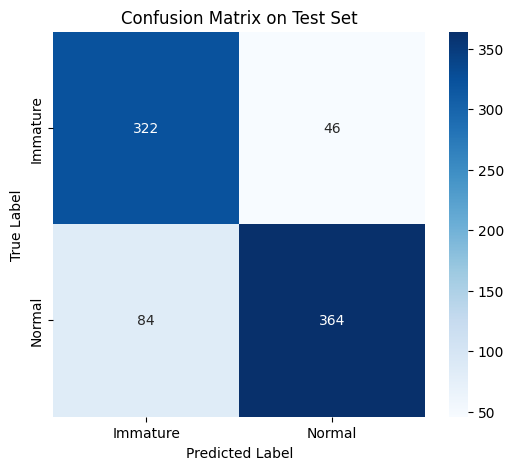

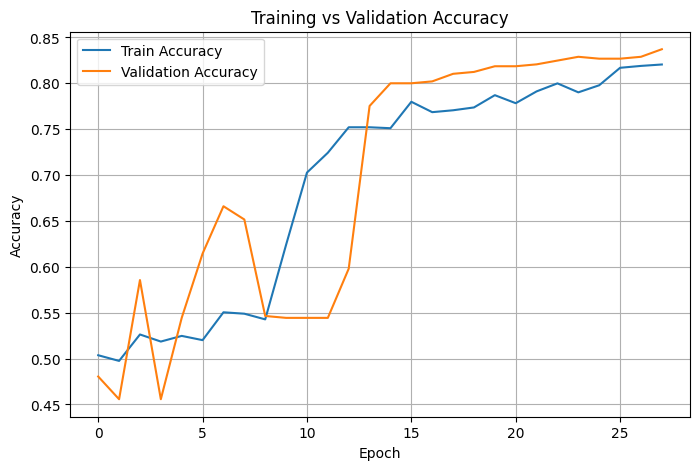

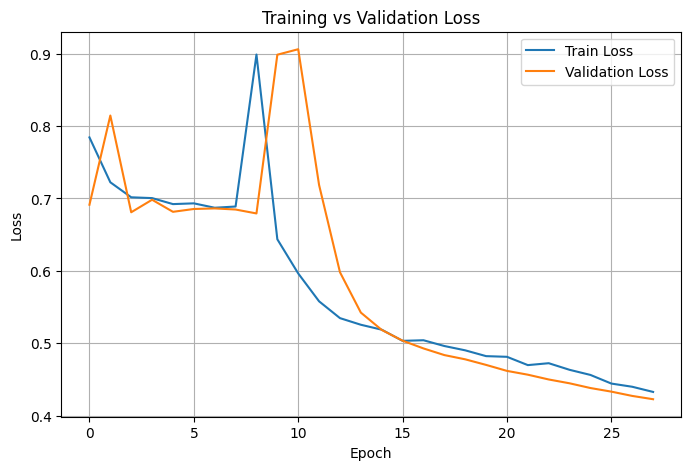

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
train_dir = '/content/Dataset5/train'
test_dir = '/content/Dataset5/test'

# Parameters
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
SEED = 123

# Load dataset
raw_train_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

raw_val_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

# Simpan class names
class_names = raw_train_ds.class_names

# Normalisasi val dan test (tanpa augmentasi)
val_ds = raw_val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)

# Hitung class weights
y_labels = []
for _, labels in raw_train_ds:
    y_labels.extend(np.argmax(labels.numpy(), axis=1))
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_labels), y=y_labels)
class_weight_dict = dict(enumerate(class_weights))

# Augmentasi hanya untuk training
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
])

# Final train dataset
train_ds = raw_train_ds.map(lambda x, y: (data_augmentation(x), y))
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)

# Base Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Full Model
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

# Compile awal
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Training awal
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:  # Hanya buka 30 layer terakhir
    layer.trainable = False

# Compile ulang dengan learning rate kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Training fine-tune
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Evaluasi
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("📋 Classification Report on Test Set:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

# Accuracy Plot
train_acc = history.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
train_loss = history.history['loss'] + history_finetune.history['loss']
val_loss = history.history['val_loss'] + history_finetune.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


#mobilenetv2, effiecientnetb0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
import numpy as np
import matplotlib.pyplot as plt

# --- Load Dataset ---
train_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# --- Augmentasi dan Prefetching ---
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# --- Fungsi Build Model ---
def build_model(base_model, preprocess_func):
    base_model.trainable = False  # freeze feature extractor
    model = models.Sequential([
        data_augmentation,
        layers.Lambda(preprocess_func),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- Train MobileNetV2 ---
mobilenet_base = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model = build_model(mobilenet_base, mobilenet_preprocess)

print("\nTraining MobileNetV2...")
mobilenet_history = mobilenet_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# --- Train EfficientNetB0 ---
efficientnet_base = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
efficientnet_model = build_model(efficientnet_base, efficientnet_preprocess)

print("\nTraining EfficientNetB0...")
efficientnet_history = efficientnet_model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training MobileNetV2...
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.7338 - loss: 0.6066 - val_accuracy: 0.9711 - val_loss: 0.1237
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9498 - loss: 0.1415 - val_accuracy: 0.9794 - val_loss: 0.0617
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9676 - loss: 0.0973 - val_accuracy: 0.9876 - val_loss: 0.0476
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9694 - loss: 0.0771 - val_accuracy: 0.9856 - val_loss: 0.0451
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9864 - loss: 0.0433 - val_accuracy: 0.9856 - val_loss: 0.0443
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9918 - val_loss: 0.0309
Epoch 7/10
61/61 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Classification Report:
               precision    recall  f1-score   support

    Immature       1.00      0.98      0.99       221
      Normal       0.99      1.00      0.99       264

    accuracy                           0.99       485
   macro avg       0.99      0.99      0.99       485
weighted avg       0.99      0.99      0.99       485

Confusion Matrix:
 [[217   4]
 [  

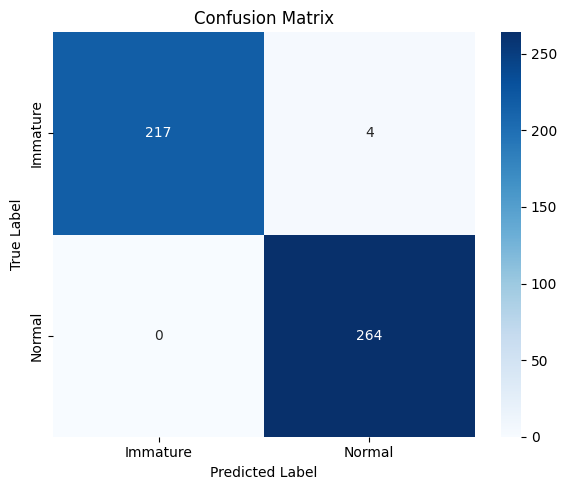

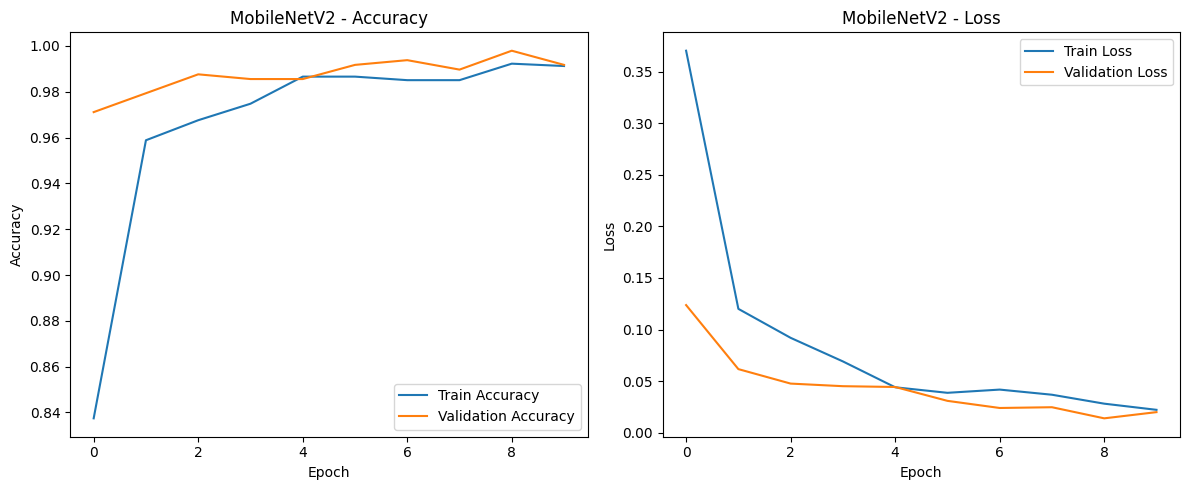

In [ ]:
# Gunakan salah satu model (contoh MobileNetV2)
model = mobilenet_model  # Atau model lain yang kamu pakai

# ===== Buat prediksi dan ambil label =====
y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))      # True label
    y_pred.extend(np.argmax(preds, axis=1))                # Predicted label

# ===== Classification Report dan Confusion Matrix =====
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# ===== Visualisasi Confusion Matrix =====
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ===== Grafik Training dan Validation (jika history tersedia) =====
# Gabungkan jika kamu fine-tune
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_acc))

# ===== Plot Accuracy dan Loss =====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'], label='Train Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Classification Report:
               precision    recall  f1-score   support

    Immature       1.00      0.99      0.99       221
      Normal       0.99      1.00      0.99       264

    accuracy                           0.99       485
   macro avg       0.99      0.99      0.99       485
weighted avg       0.99      0.99      0.99       485

Confusion Matrix:
 [[218   3]
 

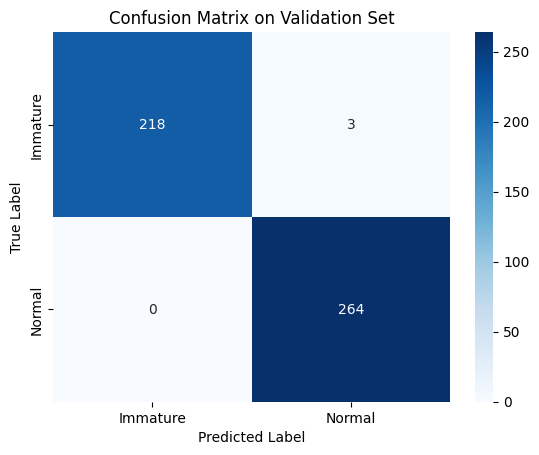

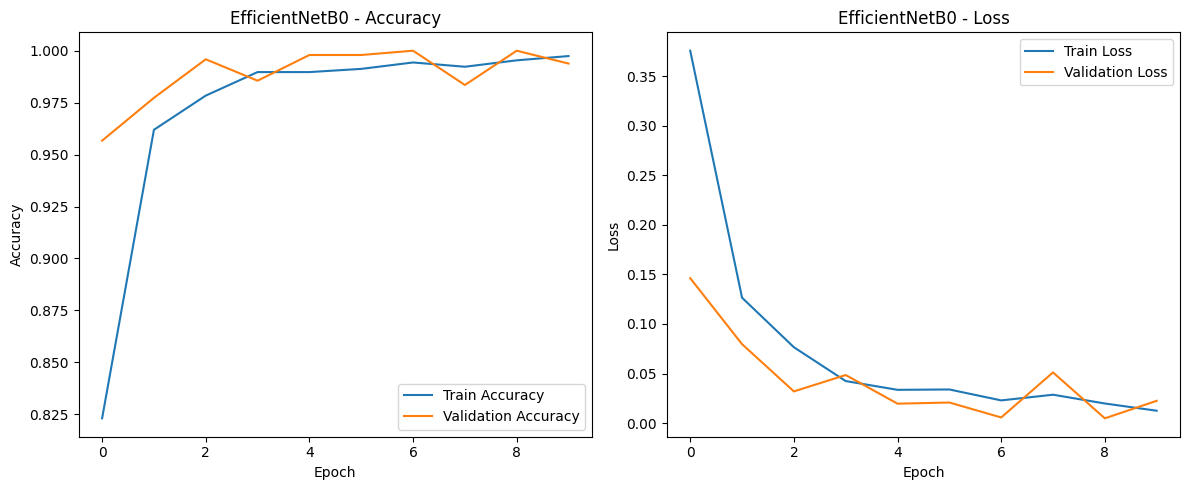

In [ ]:
#efficientnetmodel
model = efficientnet_model

# Prediksi dan label asli
y_true = []
y_pred = []
for images, labels in val_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Validation Set')
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(efficientnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(efficientnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNetB0 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(efficientnet_history.history['loss'], label='Train Loss')
plt.plot(efficientnet_history.history['val_loss'], label='Validation Loss')
plt.title('EfficientNetB0 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

